# HR Analytics Project- Understanding the Attrition in HR


In [1]:
!pip install seaborn
!pip install matplotlib

In [2]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

https://raw.githubusercontent.com/Adongo/HR-Employee-Attrition/5b8453a59f4d88ca2cf314974c0ea7dd9d392ec2/WA_Fn-UseC_-HR-Employee-Attrition.csv

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/Adongo/HR-Employee-Attrition/5b8453a59f4d88ca2cf314974c0ea7dd9d392ec2/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [8]:
df.isnull().sum()


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [9]:
df = df[['Age', 'Gender', 'Attrition', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 
         'JobSatisfaction','MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked','WorkLifeBalance', 'YearsAtCompany']]

(1) Find the age distribution of employees in IBM


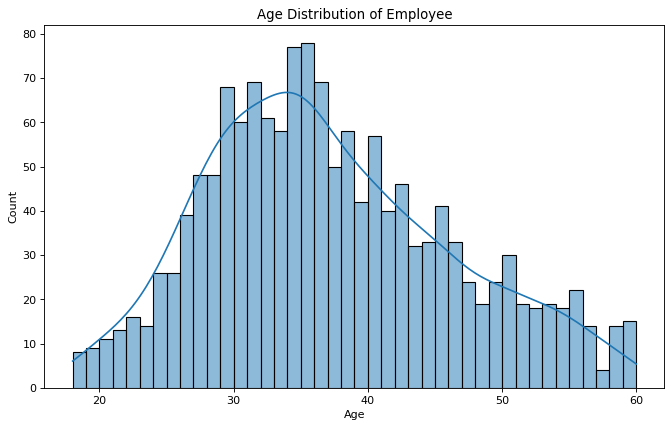

In [10]:
# histogram for age

plt.figure(figsize=(10,6), dpi=80)
sns.histplot(data=df, x='Age', bins=42, kde=True).set_title('Age Distribution of Employee');

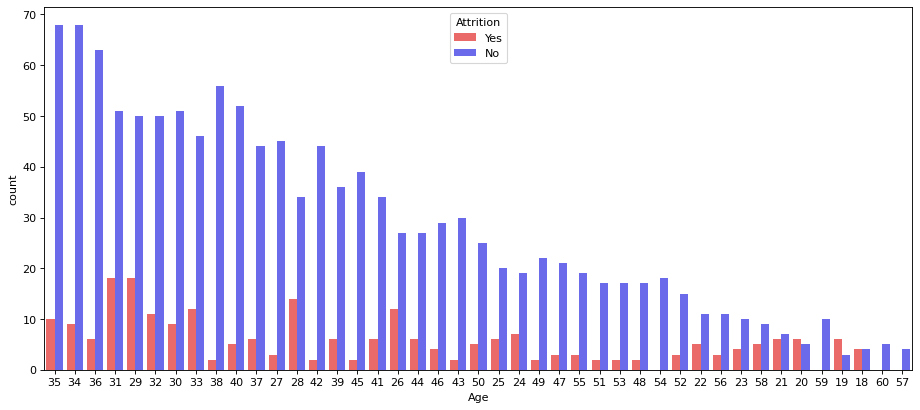

In [11]:
# print(df[(df['Attrition'] == 'Yes')].groupby('Age')['Age'].count().sort_values(ascending=False))

plt.figure(figsize=(14,6), dpi=80)
sns.countplot(data=df, x='Age', hue='Attrition', order = df['Age'].value_counts().index, palette='seismic_r').set_title
('Attrition by Age');

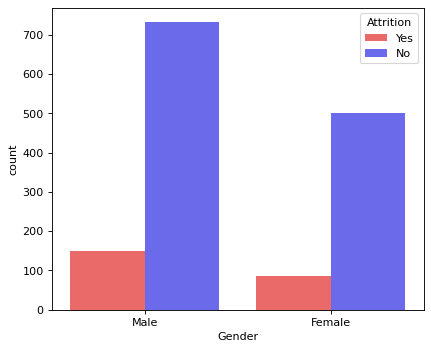

In [15]:
# print(df[(df['Attrition'] == 'Yes')].groupby('Gender')['Gender'].count().sort_values(ascending=False))

plt.figure(figsize=(6,5), dpi=80)
sns.countplot(data=df, x='Gender', hue='Attrition', order = df['Gender'].value_counts().index, palette='seismic_r').set_title
('Attrition by Gender');

(4) Explore data for Left employees


Attrition
No     1233
Yes     237
Name: Attrition, dtype: int64


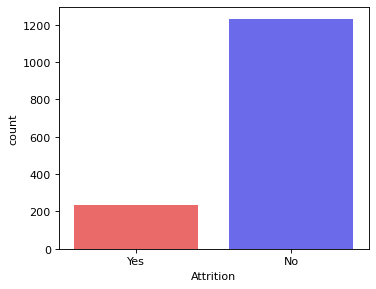

In [16]:
print(df.groupby('Attrition')['Attrition'].count())

plt.figure(figsize=(5,4), dpi=80)
sns.countplot(data=df, x='Attrition', palette='seismic_r');

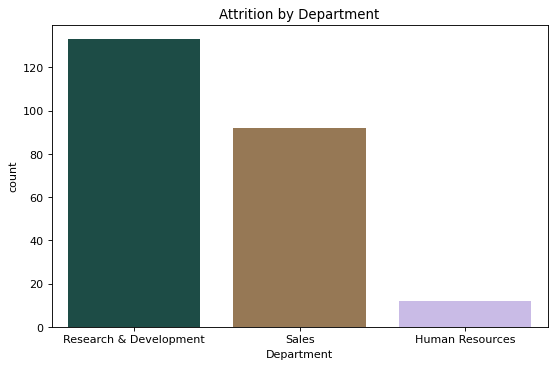

In [17]:
# print(df[(df['Attrition'] == 'Yes')].groupby('Department')['Attrition'].count().sort_values(ascending=False))

plt.figure(figsize=(8,5), dpi=80)
sns.countplot(data=df[(df['Attrition'] == 'Yes')], x='Department', palette='cubehelix', order = df['Department']
              .value_counts().index).set_title('Attrition by Department');

In [18]:
agerange = []
for age in df["Age"]:
    if age >= 18 and age < 24:
        agerange.append("18-24")
    elif age >= 25 and age < 31:
        agerange.append("25-31")
    elif age >= 32 and age < 38:
        agerange.append("32-38")
    elif age >= 39 and age < 45:
        agerange.append("39-45")
    elif age >= 46 and age < 52:
        agerange.append("46-52")
    elif age >= 53 and age < 59:
        agerange.append("53-59")
    else:
        agerange.append("60-66")
       
df["AgeRange"] = agerange

In [19]:
df.head()


,Age,Gender,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany,AgeRange
0,41,Female,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6,39-45
1,49,Male,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10,46-52
2,37,Male,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0,32-38
3,33,Female,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8,32-38
4,27,Male,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2,25-31


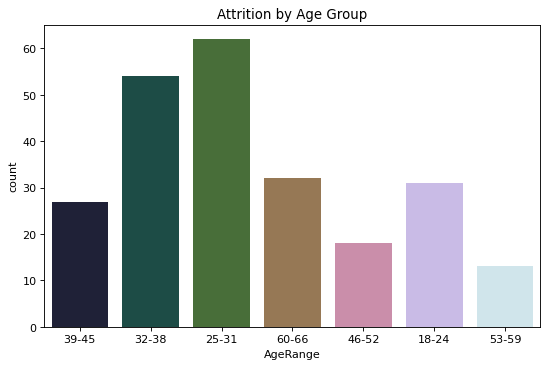

In [20]:
# print(df[(df['Attrition'] == 'Yes')].groupby('AgeRange')['AgeRange'].count().sort_values(ascending=False))

plt.figure(figsize=(8,5), dpi=80)
sns.countplot(data=df[(df['Attrition'] == 'Yes')], x='AgeRange', palette='cubehelix').set_title('Attrition by Age Group');

Classification and Interpretation
Given our decisions, we decide to use a number of classification methods to develop a model that discriminates the different classes.

In this paper we will consider: logistic regression and classification and regression trees (CART). H

Logistic Regression: Logistic Regression is a method similar to linear regression except that the dependent variable is discrete (e.g., 0 or 1). Linear logistic regression estimates the coefficients of a linear model using the selected independent variables while optimizing a classification criterion. For example, this is the logistic regression parameters for our data:

(5) Find out the distribution of employees by the education field¶


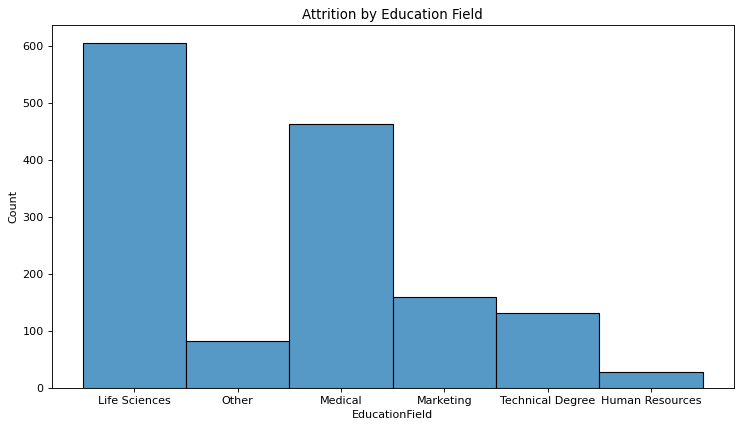

In [21]:
# print(df[(df['Attrition'] == 'Yes')].groupby('EducationField')['EducationField'].count().sort_values(ascending=False))

plt.figure(figsize=(11,6), dpi=80)
sns.histplot(data=df, x='EducationField').set_title('Attrition by Education Field');

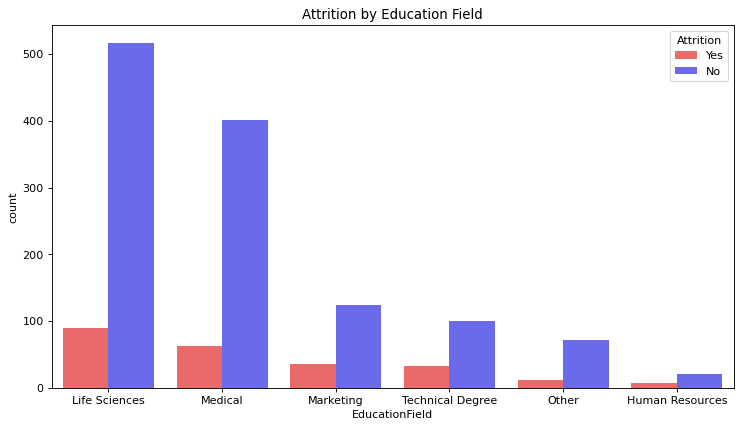

In [22]:
plt.figure(figsize=(11,6), dpi=80)
sns.countplot(data=df, x='EducationField', hue='Attrition', order = df['EducationField'].value_counts().index, palette='seismic_r').set_title('Attrition by Education Field');

(6) Explore data for Marital Status


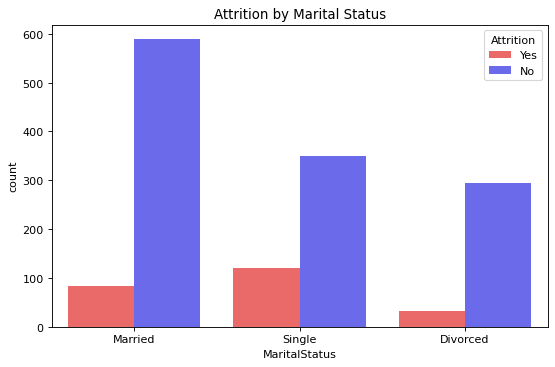

In [24]:
# print(df[(df['Attrition'] == 'Yes')].groupby('MaritalStatus')['Attrition'].count().sort_values(ascending=False))

plt.figure(figsize=(8,5),dpi=80)
sns.countplot(data=df, x='MaritalStatus', hue='Attrition', order=df['MaritalStatus'].value_counts().index, palette='seismic_r').set_title('Attrition by Marital Status');

In [25]:
df.dtypes


Age                         int64
Gender                     object
Attrition                  object
Department                 object
DistanceFromHome            int64
Education                   int64
EducationField             object
EnvironmentSatisfaction     int64
JobSatisfaction             int64
MaritalStatus              object
MonthlyIncome               int64
NumCompaniesWorked          int64
WorkLifeBalance             int64
YearsAtCompany              int64
AgeRange                   object
dtype: object

In [26]:
df['Attrition'].replace('Yes', 1, inplace=True)
df['Attrition'].replace('No', 0, inplace=True)

In [27]:
df['Gender'].replace('Male', 1, inplace=True)
df['Gender'].replace('Female', 0, inplace=True)

In [28]:
df['Department'].replace('Human Resources', 1, inplace=True)
df['Department'].replace('Research & Development', 2, inplace=True)
df['Department'].replace('Sales', 3, inplace=True)

In [29]:
df['EducationField'].replace('Human Resources', 1, inplace=True)
df['EducationField'].replace('Life Sciences', 2, inplace=True)
df['EducationField'].replace('Marketing', 3, inplace=True)
df['EducationField'].replace('Medical', 4, inplace=True)
df['EducationField'].replace('Other', 5, inplace=True)
df['EducationField'].replace('Technical Degree', 6, inplace=True)

In [30]:
df['MaritalStatus'].replace('Divorced', 1, inplace=True)
df['MaritalStatus'].replace('Married', 2, inplace=True)
df['MaritalStatus'].replace('Single', 3, inplace=True)

In [31]:
df.dtypes


Age                         int64
Gender                      int64
Attrition                   int64
Department                  int64
DistanceFromHome            int64
Education                   int64
EducationField              int64
EnvironmentSatisfaction     int64
JobSatisfaction             int64
MaritalStatus               int64
MonthlyIncome               int64
NumCompaniesWorked          int64
WorkLifeBalance             int64
YearsAtCompany              int64
AgeRange                   object
dtype: object

Regression model to predict which employees are likely to attrite

In [32]:
x = df.drop(['Attrition', 'AgeRange', 'DistanceFromHome', 'NumCompaniesWorked', 'WorkLifeBalance'], axis=1)

In [33]:
y = df[['Attrition']]


In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

Logistic Regression


In [36]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr = lr.fit(x_train, y_train)

# check the accuracy on the training set
print('Accuracy =', lr.score(x_train, y_train)*100,'%');

C:\Users\arti\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy = 84.60884353741497 %


In [37]:
lr_y_pred = lr.predict(x_test)


In [38]:
pd.DataFrame(lr_y_pred).head()


,0
0,0
1,0
2,0
3,0
4,0


In [39]:
prob = lr.predict_proba(x_test)
print(prob)

[[0.72875007 0.27124993]
 [0.83624766 0.16375234]
 [0.98783589 0.01216411]
 [0.64796826 0.35203174]
 [0.7780234  0.2219766 ]
 [0.91553093 0.08446907]
 [0.98528379 0.01471621]
 [0.91817533 0.08182467]
 [0.90123468 0.09876532]
 [0.7718631  0.2281369 ]
 [0.93975423 0.06024577]
 [0.86317662 0.13682338]
 [0.89736184 0.10263816]
 [0.93906594 0.06093406]
 [0.93772277 0.06227723]
 [0.93420544 0.06579456]
 [0.7034119  0.2965881 ]
 [0.87137082 0.12862918]
 [0.92424103 0.07575897]
 [0.96698562 0.03301438]
 [0.81583303 0.18416697]
 [0.82195682 0.17804318]
 [0.96900728 0.03099272]
 [0.95410058 0.04589942]
 [0.62287181 0.37712819]
 [0.91760128 0.08239872]
 [0.84149047 0.15850953]
 [0.72781143 0.27218857]
 [0.79223406 0.20776594]
 [0.97577239 0.02422761]
 [0.6957039  0.3042961 ]
 [0.89916657 0.10083343]
 [0.80042212 0.19957788]
 [0.88691268 0.11308732]
 [0.93250308 0.06749692]
 [0.78512675 0.21487325]
 [0.83955593 0.16044407]
 [0.96094854 0.03905146]
 [0.97043479 0.02956521]
 [0.97454616 0.02545384]


In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print('Test Accuracy Score:', accuracy_score(y_test, lr_y_pred)*100, '%\n')

print('----------------------Classification Report----------------------\n', classification_report(y_test, lr_y_pred))
print('----------------------Confusion Matrix----------------------\n', confusion_matrix(y_test, lr_y_pred))

Test Accuracy Score: 84.35374149659864 %

----------------------Classification Report----------------------
               precision    recall  f1-score   support

           0       0.85      1.00      0.91       248
           1       0.50      0.02      0.04        46

    accuracy                           0.84       294
   macro avg       0.67      0.51      0.48       294
weighted avg       0.79      0.84      0.78       294

----------------------Confusion Matrix----------------------
 [[247   1]
 [ 45   1]]


In [41]:
# add random values to check the proabily of attrition of the employee

pd.DataFrame(x_train).head()

,0,1,2,3,4,5,6,7,8,9
0,-0.521685,0.810147,1.447414,1.082202,0.575136,1.157979,1.132107,-0.147264,0.848114,1.135965
1,0.130052,-1.234344,-0.495690,2.072607,2.091638,1.157979,0.212661,1.227202,-0.448287,-0.646957
2,-1.173422,-1.234344,-0.495690,0.091798,-0.941366,0.245867,1.132107,-0.147264,-0.801637,-0.646957
3,-0.304439,0.810147,1.447414,-0.898607,2.091638,-0.666245,0.212661,-0.147264,0.080674,0.487630
4,-0.956176,0.810147,-0.495690,-1.889012,-0.941366,0.245867,-0.706785,-0.147264,0.027394,0.163462


In [42]:
input = [[-0.657246, 0.813029, -0.503547, -0.878027, -0.909680, 1.161409, -1.560113, -0.144032, -0.908062, -0.494890]]
print(lr.predict_proba(input))

[[0.79075804 0.20924196]]
